In [1]:
import sys
sys.path.insert(1, '/kaggle/working/cec2017-py')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cec2017.functions as functions

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Testing Function 21

Function 21 optimization complete:
Mean fitness: 2243.924453
Median fitness: 2204.823175
Best fitness: 2200.000009
Worst fitness: 2329.293698
Standard deviation: 54.149400
Best distance from optimum (ERROR): 100.000009 / 1.000000E+02
Worst distance from optimum (ERROR): 229.293698 / 2.292937E+02
Mean distance from optimum (ERROR): 143.924453 / 1.439245E+02
Median distance from optimum (ERROR): 104.823175 / 1.048232E+02
STD distance distance from optimum (ERROR): 54.149400 / 5.414940E+01


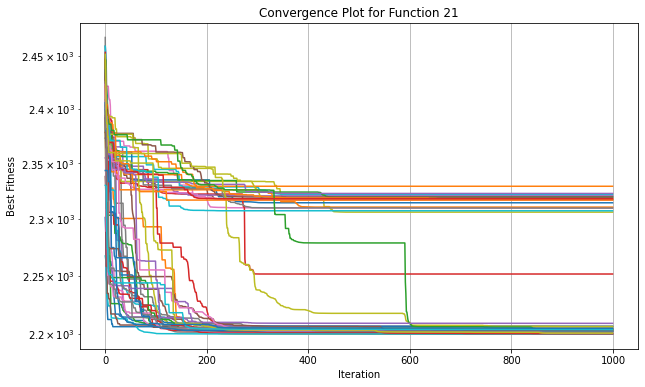

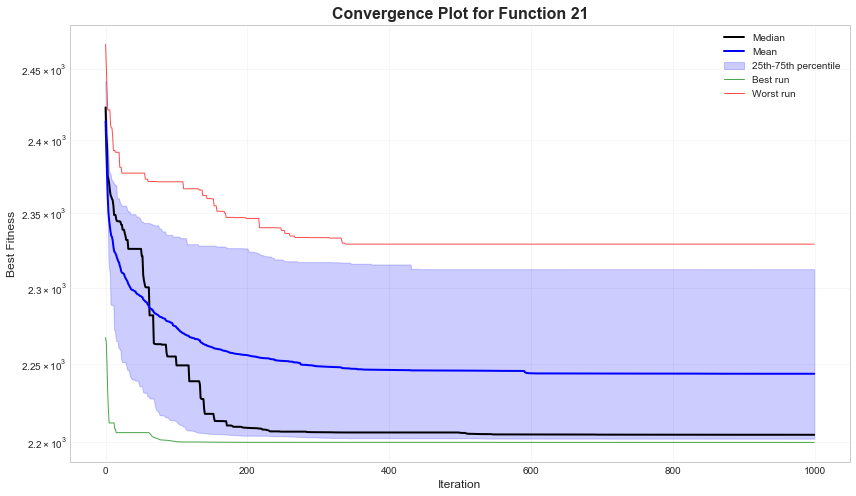


Testing Function 22

Function 22 optimization complete:
Mean fitness: 2303.146701
Median fitness: 2307.139951
Best fitness: 2220.005933
Worst fitness: 2317.679915
Standard deviation: 19.184775
Best distance from optimum (ERROR): 20.005933 / 2.000593E+01
Worst distance from optimum (ERROR): 117.679915 / 1.176799E+02
Mean distance from optimum (ERROR): 103.146701 / 1.031467E+02
Median distance from optimum (ERROR): 107.139951 / 1.071400E+02
STD distance distance from optimum (ERROR): 19.184775 / 1.918478E+01


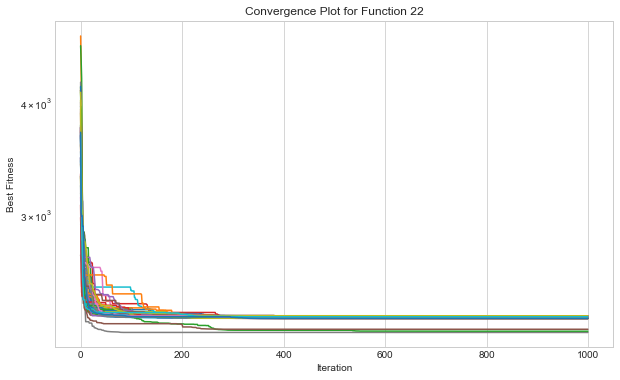

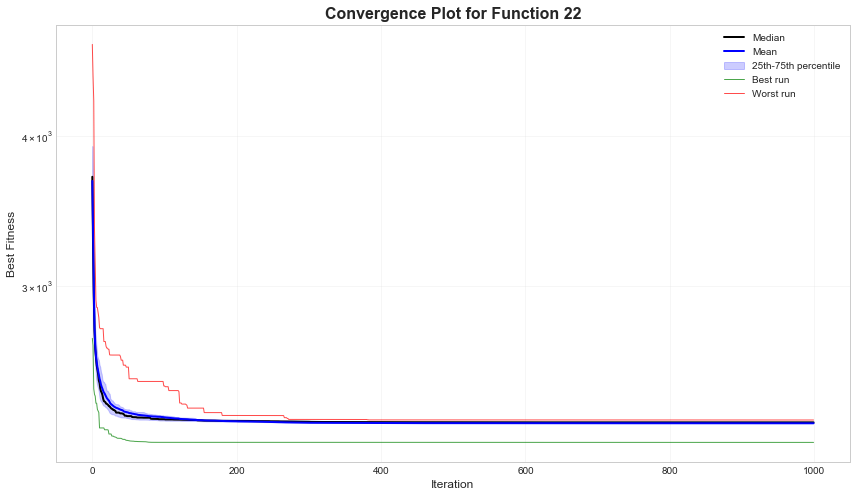


Testing Function 23

Function 23 optimization complete:
Mean fitness: 2622.078907
Median fitness: 2620.052348
Best fitness: 2609.041688
Worst fitness: 2646.290955
Standard deviation: 8.639155
Best distance from optimum (ERROR): 309.041688 / 3.090417E+02
Worst distance from optimum (ERROR): 346.290955 / 3.462910E+02
Mean distance from optimum (ERROR): 322.078907 / 3.220789E+02
Median distance from optimum (ERROR): 320.052348 / 3.200523E+02
STD distance distance from optimum (ERROR): 8.639155 / 8.639155E+00


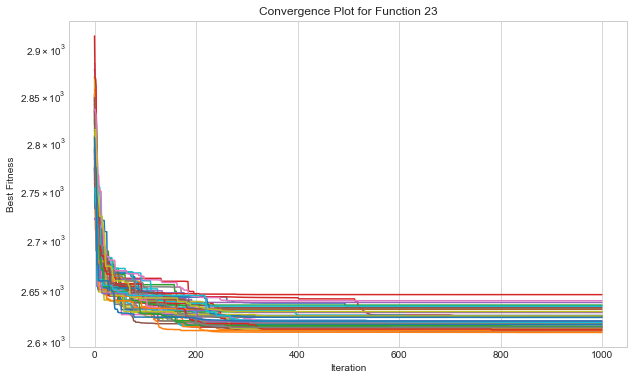

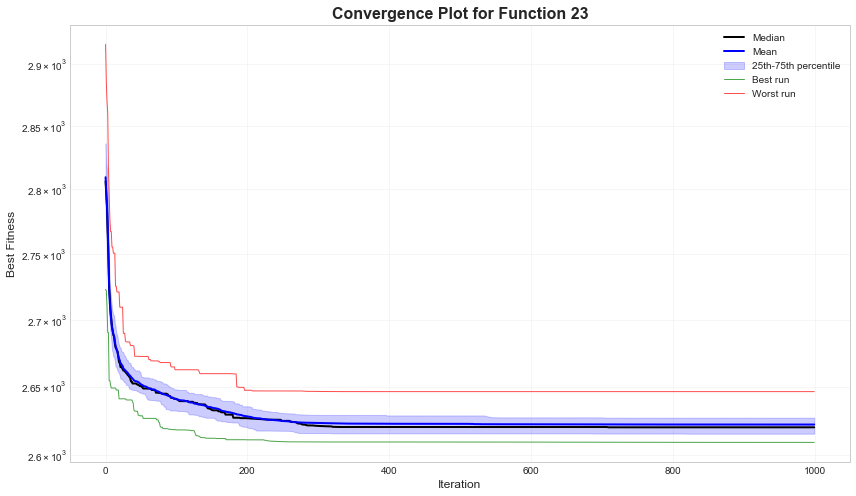


Testing Function 24

Function 24 optimization complete:
Mean fitness: 2695.403975
Median fitness: 2749.517067
Best fitness: 2401.567283
Worst fitness: 2767.651388
Standard deviation: 110.605590
Best distance from optimum (ERROR): 1.567283 / 1.567283E+00
Worst distance from optimum (ERROR): 367.651388 / 3.676514E+02
Mean distance from optimum (ERROR): 295.403975 / 2.954040E+02
Median distance from optimum (ERROR): 349.517067 / 3.495171E+02
STD distance distance from optimum (ERROR): 110.605590 / 1.106056E+02


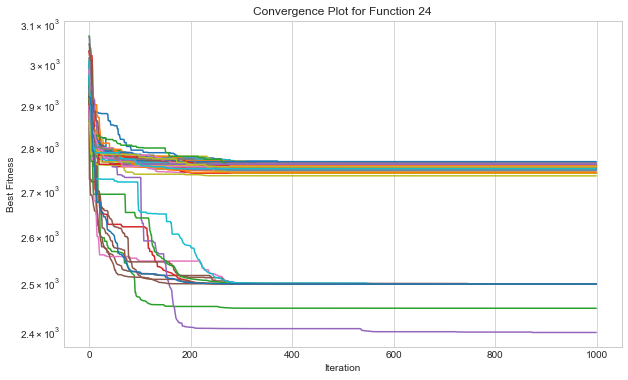

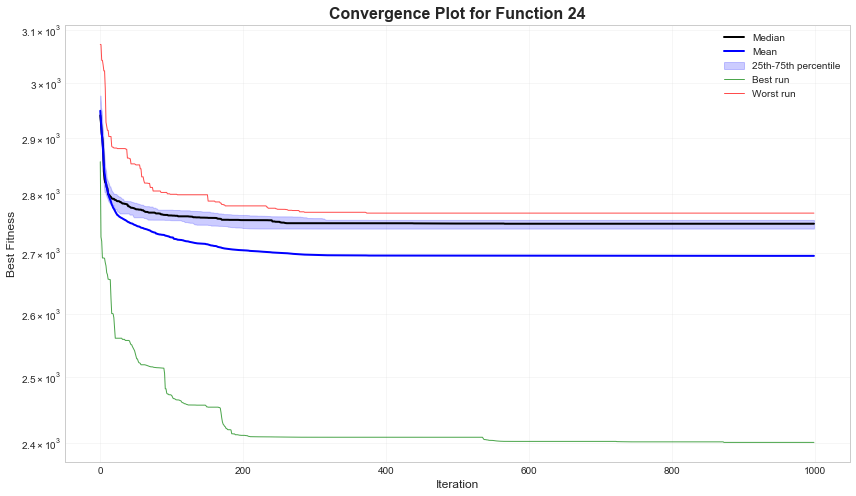


Testing Function 25

Function 25 optimization complete:
Mean fitness: 2925.466802
Median fitness: 2910.874165
Best fitness: 2897.745675
Worst fitness: 3024.275625
Standard deviation: 28.840767
Best distance from optimum (ERROR): 397.745675 / 3.977457E+02
Worst distance from optimum (ERROR): 524.275625 / 5.242756E+02
Mean distance from optimum (ERROR): 425.466802 / 4.254668E+02
Median distance from optimum (ERROR): 410.874165 / 4.108742E+02
STD distance distance from optimum (ERROR): 28.840767 / 2.884077E+01


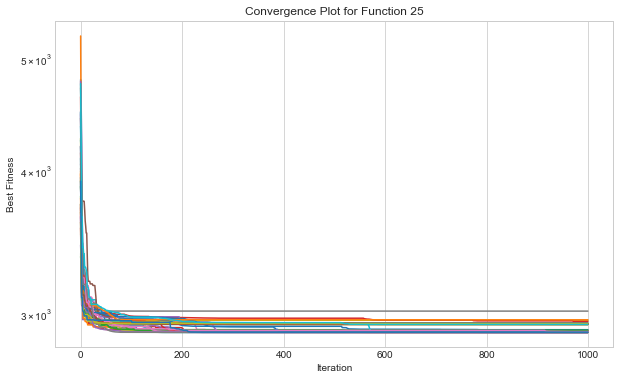

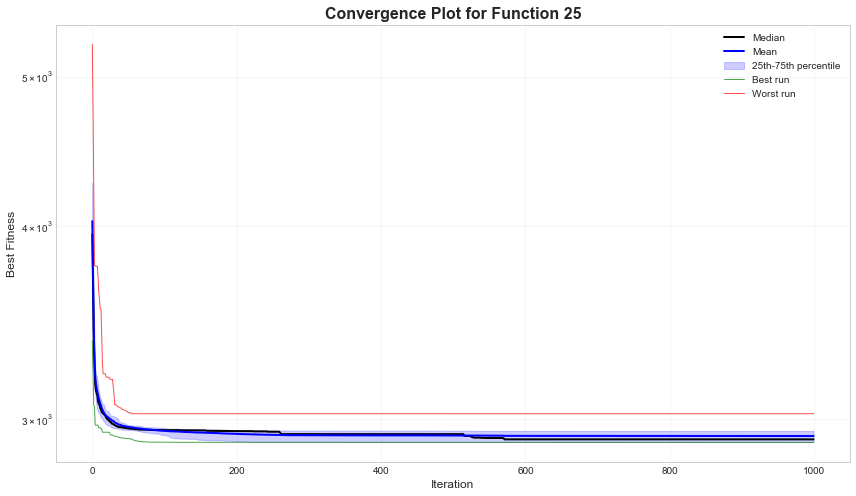


Testing Function 26

Function 26 optimization complete:
Mean fitness: 2976.034061
Median fitness: 2989.816154
Best fitness: 2800.001022
Worst fitness: 3182.035864
Standard deviation: 91.919551
Best distance from optimum (ERROR): 200.001022 / 2.000010E+02
Worst distance from optimum (ERROR): 582.035864 / 5.820359E+02
Mean distance from optimum (ERROR): 376.034061 / 3.760341E+02
Median distance from optimum (ERROR): 389.816154 / 3.898162E+02
STD distance distance from optimum (ERROR): 91.919551 / 9.191955E+01


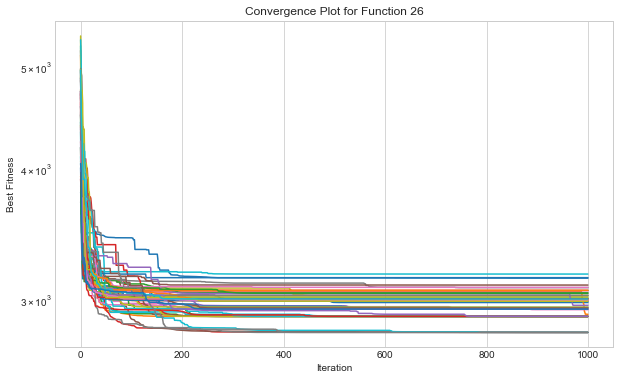

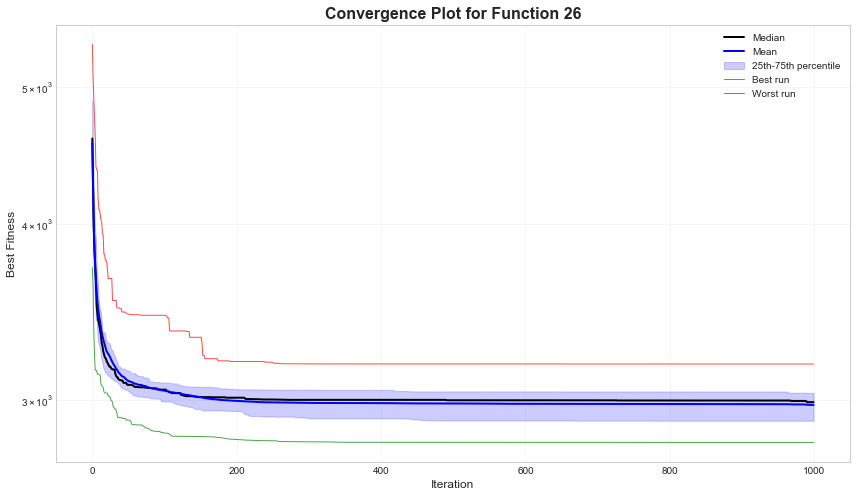


Testing Function 27

Function 27 optimization complete:
Mean fitness: 3103.516206
Median fitness: 3099.090207
Best fitness: 3090.359323
Worst fitness: 3171.675843
Standard deviation: 16.495925
Best distance from optimum (ERROR): 390.359323 / 3.903593E+02
Worst distance from optimum (ERROR): 471.675843 / 4.716758E+02
Mean distance from optimum (ERROR): 403.516206 / 4.035162E+02
Median distance from optimum (ERROR): 399.090207 / 3.990902E+02
STD distance distance from optimum (ERROR): 16.495925 / 1.649592E+01


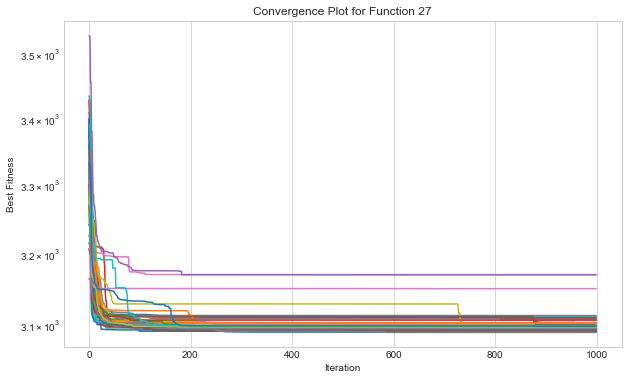

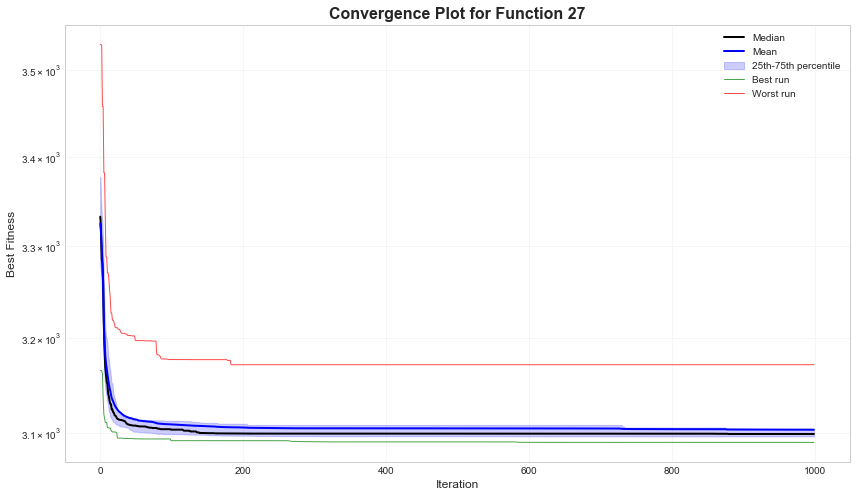


Testing Function 28

Function 28 optimization complete:
Mean fitness: 3295.129704
Median fitness: 3383.733964
Best fitness: 3100.000111
Worst fitness: 3625.370302
Standard deviation: 125.211814
Best distance from optimum (ERROR): 300.000111 / 3.000001E+02
Worst distance from optimum (ERROR): 825.370302 / 8.253703E+02
Mean distance from optimum (ERROR): 495.129704 / 4.951297E+02
Median distance from optimum (ERROR): 583.733964 / 5.837340E+02
STD distance distance from optimum (ERROR): 125.211814 / 1.252118E+02


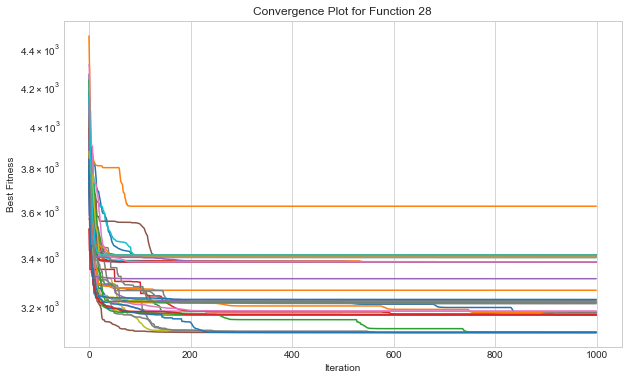

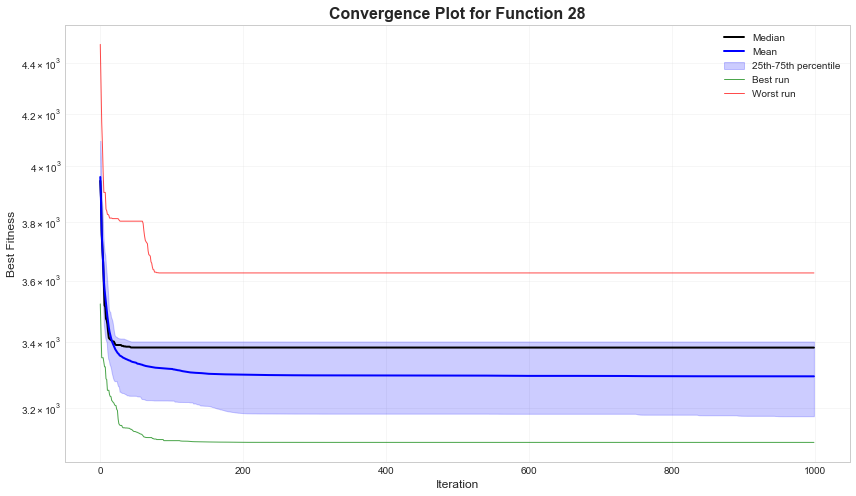


Testing Function 29


In [ ]:
 
def adaptive_pso(objective_func, dim, num_particles, max_iter, bounds=(-100, 100)):
    # Initialize particles and velocities
    particles = np.random.uniform(bounds[0], bounds[1], (num_particles, dim))
    velocities = np.random.uniform(-1, 1, (num_particles, dim))
    
    # Initialize personal best and global best
    pbest = particles.copy()
    pbest_fitness = np.array([objective_func(p) for p in pbest])
    gbest = pbest[np.argmin(pbest_fitness)]
    gbest_fitness = np.min(pbest_fitness)
    
    # PSO parameters
    w_max, w_min = 0.9, 0.2  # Inertia weight bounds
    c1_max, c1_min = 2.8, 0.2  # Cognitive parameter bounds
    c2_max, c2_min = 2.8, 0.2  # Social parameter bounds
    
    # Adaptive parameter variables
    w = w_max
    c1 = c1_max
    c2 = c2_min
    
    # Variables for adaptation
    prev_best_fitness = gbest_fitness
    stagnation_counter = 0
    
    convergence = []
    
    # Main PSO loop
    for iteration in range(max_iter):
        # Calculate progress
        progress = iteration / max_iter
        
        # Adapt parameters
        w = w_max - (w_max - w_min) * progress
        c1 = c1_max - (c1_max - c1_min) * progress
        c2 = c2_min + (c2_max - c2_min) * progress
        
        # Update velocities
        r1, r2 = np.random.rand(2)
        velocities = (w * velocities
                      + c1 * r1 * (pbest - particles)
                      + c2 * r2 * (gbest - particles))
        
        # Update particles
        particles += velocities
        
        # Apply bounds
        particles = np.clip(particles, bounds[0], bounds[1])
        
        # Evaluate fitness
        fitness = np.array([objective_func(p) for p in particles])
        
        # Update personal best
        improved = fitness < pbest_fitness
        pbest[improved] = particles[improved]
        pbest_fitness[improved] = fitness[improved]
        
        # Update global best
        if np.min(fitness) < gbest_fitness:
            gbest = particles[np.argmin(fitness)]
            gbest_fitness = np.min(fitness)
            stagnation_counter = 0
        else:
            stagnation_counter += 1
        
        # Adaptation based on improvement
        if gbest_fitness < prev_best_fitness:
            # If improving, increase exploration
            w = min(w_max, w * 1.05)
            c1 = min(c1_max, c1 * 1.05)
            c2 = max(c2_min, c2 * 0.95)
        else:
            # If stagnating, increase exploitation
            w = max(w_min, w * 0.95)
            c1 = max(c1_min, c1 * 0.95)
            c2 = min(c2_max, c2 * 1.05)
        
        # Store current best fitness for next iteration's comparison
        prev_best_fitness = gbest_fitness
        convergence.append(gbest_fitness)
        
        # Print progress
        if iteration % 250 == 0:
            pass
            #print(f"Iteration {iteration}: Best fitness = {gbest_fitness:.6f}, w = {w:.4f}, c1 = {c1:.4f}, c2 = {c2:.4f}")
        
        # Optional: Reset if stagnation occurs for too long
        if stagnation_counter > 50:
            particles = np.random.uniform(bounds[0], bounds[1], (num_particles, dim))
            velocities = np.random.uniform(-1, 1, (num_particles, dim))
            stagnation_counter = 0
    
    return gbest, gbest_fitness, w, c1, c2, convergence

# Set parameters
dim = 10
num_particles = 100
max_iter = 1000
bounds = (-100, 100)
num_iterations = 51

# List to store results for all functions
all_results = []

# Test all 30 functions
for func_num in range(21, 31):
    print(f"\nTesting Function {func_num}")
    
    # Get the CEC2017 function
    cec_function = getattr(functions, f'f{func_num}')
    
    # Create a wrapper function to handle the different input format
    def objective_func(x):
        return cec_function(x.reshape(1, -1))[0]
    
    # Run iterations
    results = []
    distances = []
    all_convergences = []
    for i in range(num_iterations):
        best_solution, best_fitness, final_w, final_c1, final_c2, convergence = adaptive_pso(objective_func, dim, num_particles, max_iter, bounds)
        distance = abs(best_fitness - func_num * 100)
        results.append(best_fitness)
        distances.append(distance)
        all_convergences.append(convergence)
        #print(f"Run {i+1}: Final fitness = {best_fitness:.6f}, Distance from optimum = {distance:.6f}, Final parameters: w = {final_w:.3f}, c1 = {final_c1:.3f}, c2 = {final_c2:.3f}")
    
    # Calculate statistics
    mean_fitness = np.mean(results)
    median_fitness = np.median(results)
    best_fitness = np.min(results)
    worst_fitness = np.max(results)
    std_fitness = np.std(results)
    best_distance = np.min(distances)
    worst_distance = np.max(distances)
    mean_distance = np.mean(distances)
    median_distance = np.median(distances)
    std_distance = np.std(distances)
    
    # Store results for this function
    all_results.append([best_fitness, worst_fitness, median_fitness, mean_fitness, std_fitness])
    
    print(f"\nFunction {func_num} optimization complete:")
    print(f"Mean fitness: {mean_fitness:.6f}")
    print(f"Median fitness: {median_fitness:.6f}")
    print(f"Best fitness: {best_fitness:.6f}")
    print(f"Worst fitness: {worst_fitness:.6f}")
    print(f"Standard deviation: {std_fitness:.6f}")
    print(f"Best distance from optimum (ERROR): {best_distance:.6f} / {best_distance:.6E}")
    print(f"Worst distance from optimum (ERROR): {worst_distance:.6f} / {worst_distance:.6E}")
    print(f"Mean distance from optimum (ERROR): {mean_distance:.6f} / {mean_distance:.6E}")
    print(f"Median distance from optimum (ERROR): {median_distance:.6f} / {median_distance:.6E}")
    print(f"STD distance distance from optimum (ERROR): {std_distance:.6f} / {std_distance:.6E}")
    
    
    # Plot convergence
    plt.figure(figsize=(10, 6))
    for i, conv in enumerate(all_convergences):
        plt.plot(conv, label=f'Run {i+1}')
    plt.title(f'Convergence Plot for Function {func_num}')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    #plt.legend()
    plt.yscale('log')  # Use log scale for y-axis to better visualize improvements
    plt.grid(True)
    plt.show()
    
    # Set the style
    plt.style.use('seaborn-whitegrid')

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(12, 7))

    # Convert all_convergences to a numpy array
    convergences_array = np.array(all_convergences)

    # Calculate median, 25th and 75th percentiles
    median_convergence = np.median(convergences_array, axis=0)
    mean_convergence = np.mean(convergences_array, axis=0)
    percentile_25 = np.percentile(convergences_array, 25, axis=0)
    percentile_75 = np.percentile(convergences_array, 75, axis=0)

    # Plot the median convergence
    ax.plot(median_convergence, color='black', linewidth=2, label='Median')
    ax.plot(mean_convergence, color='blue', linewidth=2, label='Mean')

    # Plot the shaded area for the interquartile range
    ax.fill_between(range(len(median_convergence)), 
                    percentile_25,
                    percentile_75,
                    color='blue', alpha=0.2, label='25th-75th percentile')

    # Optionally, plot the best and worst runs
    best_run = np.min(convergences_array, axis=0)
    worst_run = np.max(convergences_array, axis=0)
    ax.plot(best_run, color='green', linewidth=1, alpha=0.7, label='Best run')
    ax.plot(worst_run, color='red', linewidth=1, alpha=0.7, label='Worst run')

    # Customize the plot
    ax.set_title(f'Convergence Plot for Function {func_num}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Iteration', fontsize=12)
    ax.set_ylabel('Best Fitness', fontsize=12)
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="-", alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Customize the legend
    ax.legend(fontsize=10, loc='upper right')

    # Improve the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [3]:
def surface_plot_1(function, domain=(-100,100), points=30, dimension=2, ax=None):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))
    surf = ax.plot_surface(X, Y, Z, cmap='plasma') #, edgecolor='none')
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15, label='')
    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Set the axis color to match the background color
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()
    
    return fig

In [4]:
def contour_plot_1(function, domain=(-100,100), points=30, ax=None, dimension=2):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)

    fig = plt.figure()
    ax = fig.gca()

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))
    cont = ax.contourf(X, Y, Z, lw = 1, levels=20, cmap='plasma')
    ax.contour(X, Y, Z, colors="k", linestyles="solid")
    cbar = fig.colorbar(cont, shrink=0.5, aspect=5, pad=0.15, label='')
#     cbar = fig.colorbar(ax.collections[0], shrink=0.5, aspect=5, pad=0.15, label='')

    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()
    
    return fig

In [5]:
def surface_plot_2(function, domain=(-100,100), points=30, dimension=2, ax=None):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))

    # plot surface
    surf = ax.plot_surface(X, Y, Z, cmap='plasma') #, edgecolor='none')
    ax.contour(X, Y, Z, zdir='z', cmap="plasma", linestyles="solid", offset=40)
    ax.contour(X, Y, Z, zdir='z', colors="k", linestyles="solid")
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15, label='')
    ax.set_title(function.__name__)

    # plot contour
    ax.contour(X, Y, Z, levels=10, cmap='plasma')
    
    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('y')

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()
    
    return fig



In [6]:
Dim = 100
NP = 10
bound = 100

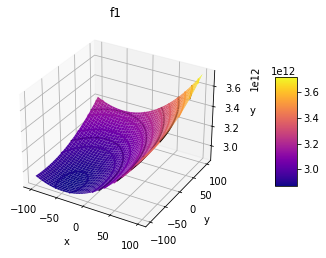

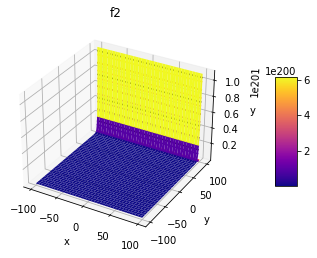

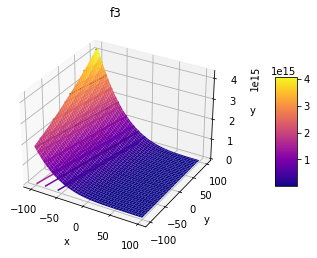

KeyboardInterrupt: 

In [7]:
for f in functions.all_functions:
    surface_plot_2(f, points=120, dimension=Dim)

In [ ]:
for f in functions.all_functions:
    contour_plot_1(f, points=120, dimension=Dim)